In [6]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=8df6949b81cd8fcd3d6ea851221faf1f2d73d9c93cc23bd1b87eafb47b8761c7
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [7]:

from pyspark.sql.types import *
from pyspark.sql.functions import *
data_file = "/content/drive/MyDrive/Project/pollution_us_2000_2016.csv"

from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("YourAppName") \
    .getOrCreate()


In [8]:
data_schema = StructType([StructField('Index', IntegerType(), True), StructField('State Code', IntegerType(), True),
                     StructField('County Code', IntegerType(), True),
                     StructField('SiteNum', IntegerType(), True),
                     StructField('Address', StringType(), True),
                     StructField('State', StringType(), True),
                     StructField('County', StringType(), True),
                     StructField('City', StringType(), True),
                     StructField('Date', DateType(), True),
                     StructField('NO2 Units', StringType(), True),
                     StructField('NO2 Mean', FloatType(), True),
                     StructField('NO2 Max Value', FloatType(), True),
                     StructField('NO2 Max Hour', IntegerType(),True),
                     StructField('NO2 AQI', IntegerType(), True),
                     StructField('O3 Units', StringType(), True),
                     StructField('O3 Mean', FloatType(), True),
                     StructField('O3 Max Value', FloatType(), True),
                     StructField('O3 Max Hour', IntegerType(), True),
                     StructField('O3 AQI', IntegerType(), True),
                     StructField('SO2 Units', StringType(), True),
                     StructField('SO2 Mean', FloatType(), True),
                     StructField('SO2 Max Value', FloatType(), True),
                     StructField('SO2 Max Hour', IntegerType(),True),
                     StructField('SO2 AQI', FloatType(), True),
                     StructField('CO Units', StringType(), True),
                     StructField('CO Mean', FloatType(), True),
                     StructField('CO Max Value', FloatType(), True),
                     StructField('CO Max Hour', IntegerType(),True),
                     StructField('CO AQI', FloatType(), True)])

In [9]:

# Read the CSV file into a DataFrame
df = spark.read.csv(data_file, header=True, schema=data_schema)

# Show the DataFrame
df.show()


+-----+----------+-----------+-------+--------------------+-------+--------+-------+----------+-----------------+---------+-------------+------------+-------+-----------------+--------+------------+-----------+------+-----------------+--------+-------------+------------+-------+-----------------+--------+------------+-----------+------+
|Index|State Code|County Code|SiteNum|             Address|  State|  County|   City|      Date|        NO2 Units| NO2 Mean|NO2 Max Value|NO2 Max Hour|NO2 AQI|         O3 Units| O3 Mean|O3 Max Value|O3 Max Hour|O3 AQI|        SO2 Units|SO2 Mean|SO2 Max Value|SO2 Max Hour|SO2 AQI|         CO Units| CO Mean|CO Max Value|CO Max Hour|CO AQI|
+-----+----------+-----------+-------+--------------------+-------+--------+-------+----------+-----------------+---------+-------------+------------+-------+-----------------+--------+------------+-----------+------+-----------------+--------+-------------+------------+-------+-----------------+--------+------------+---

In [10]:
df.cache()

DataFrame[Index: int, State Code: int, County Code: int, SiteNum: int, Address: string, State: string, County: string, City: string, Date: date, NO2 Units: string, NO2 Mean: float, NO2 Max Value: float, NO2 Max Hour: int, NO2 AQI: int, O3 Units: string, O3 Mean: float, O3 Max Value: float, O3 Max Hour: int, O3 AQI: int, SO2 Units: string, SO2 Mean: float, SO2 Max Value: float, SO2 Max Hour: int, SO2 AQI: float, CO Units: string, CO Mean: float, CO Max Value: float, CO Max Hour: int, CO AQI: float]

In [11]:
df.printSchema()

root
 |-- Index: integer (nullable = true)
 |-- State Code: integer (nullable = true)
 |-- County Code: integer (nullable = true)
 |-- SiteNum: integer (nullable = true)
 |-- Address: string (nullable = true)
 |-- State: string (nullable = true)
 |-- County: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Date: date (nullable = true)
 |-- NO2 Units: string (nullable = true)
 |-- NO2 Mean: float (nullable = true)
 |-- NO2 Max Value: float (nullable = true)
 |-- NO2 Max Hour: integer (nullable = true)
 |-- NO2 AQI: integer (nullable = true)
 |-- O3 Units: string (nullable = true)
 |-- O3 Mean: float (nullable = true)
 |-- O3 Max Value: float (nullable = true)
 |-- O3 Max Hour: integer (nullable = true)
 |-- O3 AQI: integer (nullable = true)
 |-- SO2 Units: string (nullable = true)
 |-- SO2 Mean: float (nullable = true)
 |-- SO2 Max Value: float (nullable = true)
 |-- SO2 Max Hour: integer (nullable = true)
 |-- SO2 AQI: float (nullable = true)
 |-- CO Units: string (nul

In [12]:
display(df)

DataFrame[Index: int, State Code: int, County Code: int, SiteNum: int, Address: string, State: string, County: string, City: string, Date: date, NO2 Units: string, NO2 Mean: float, NO2 Max Value: float, NO2 Max Hour: int, NO2 AQI: int, O3 Units: string, O3 Mean: float, O3 Max Value: float, O3 Max Hour: int, O3 AQI: int, SO2 Units: string, SO2 Mean: float, SO2 Max Value: float, SO2 Max Hour: int, SO2 AQI: float, CO Units: string, CO Mean: float, CO Max Value: float, CO Max Hour: int, CO AQI: float]

In [13]:
from pyspark.sql.functions import when, count, col
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+-----+----------+-----------+-------+-------+-----+------+----+----+---------+--------+-------------+------------+-------+--------+-------+------------+-----------+------+---------+--------+-------------+------------+-------+--------+-------+------------+-----------+------+
|Index|State Code|County Code|SiteNum|Address|State|County|City|Date|NO2 Units|NO2 Mean|NO2 Max Value|NO2 Max Hour|NO2 AQI|O3 Units|O3 Mean|O3 Max Value|O3 Max Hour|O3 AQI|SO2 Units|SO2 Mean|SO2 Max Value|SO2 Max Hour|SO2 AQI|CO Units|CO Mean|CO Max Value|CO Max Hour|CO AQI|
+-----+----------+-----------+-------+-------+-----+------+----+----+---------+--------+-------------+------------+-------+--------+-------+------------+-----------+------+---------+--------+-------------+------------+-------+--------+-------+------------+-----------+------+
|    0|         0|          0|      0|      0|    0|     0|   0|   0|        0|       0|            0|           0|      0|       0|      0|           0|          0|     0|

In [14]:
display(df.select("City").where(col("City").isNotNull()).groupBy("City").count().orderBy("count", ascending=False))

DataFrame[City: string, count: bigint]

In [15]:
display(df.select("State").where(col("State").isNotNull()).groupBy('State').count().orderBy("count", ascending=False))

DataFrame[State: string, count: bigint]

In [16]:
print((df.count(), len(df.columns)))

(1746661, 29)


# Filtering Unwanted Locations

In [17]:
df = df.filter((df.City != 'Not in a city') & (df.State != 'Country Of Mexico'))
df.agg({"Date": "max"}).collect()[0]


Row(max(Date)=datetime.date(2016, 5, 31))

# Null value replacement with Median

In [18]:
from pyspark.sql.functions import when
imputeCols = [
"SO2 AQI",
"CO AQI",
]


In [19]:
from pyspark.ml.feature import Imputer
imputer = Imputer(strategy="mean", inputCols=imputeCols, outputCols=imputeCols)
df = imputer.fit(df).transform(df)
display(df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]))

DataFrame[Index: bigint, State Code: bigint, County Code: bigint, SiteNum: bigint, Address: bigint, State: bigint, County: bigint, City: bigint, Date: bigint, NO2 Units: bigint, NO2 Mean: bigint, NO2 Max Value: bigint, NO2 Max Hour: bigint, NO2 AQI: bigint, O3 Units: bigint, O3 Mean: bigint, O3 Max Value: bigint, O3 Max Hour: bigint, O3 AQI: bigint, SO2 Units: bigint, SO2 Mean: bigint, SO2 Max Value: bigint, SO2 Max Hour: bigint, SO2 AQI: bigint, CO Units: bigint, CO Mean: bigint, CO Max Value: bigint, CO Max Hour: bigint, CO AQI: bigint]

# Data Exploration

**Correlation Matrix**

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

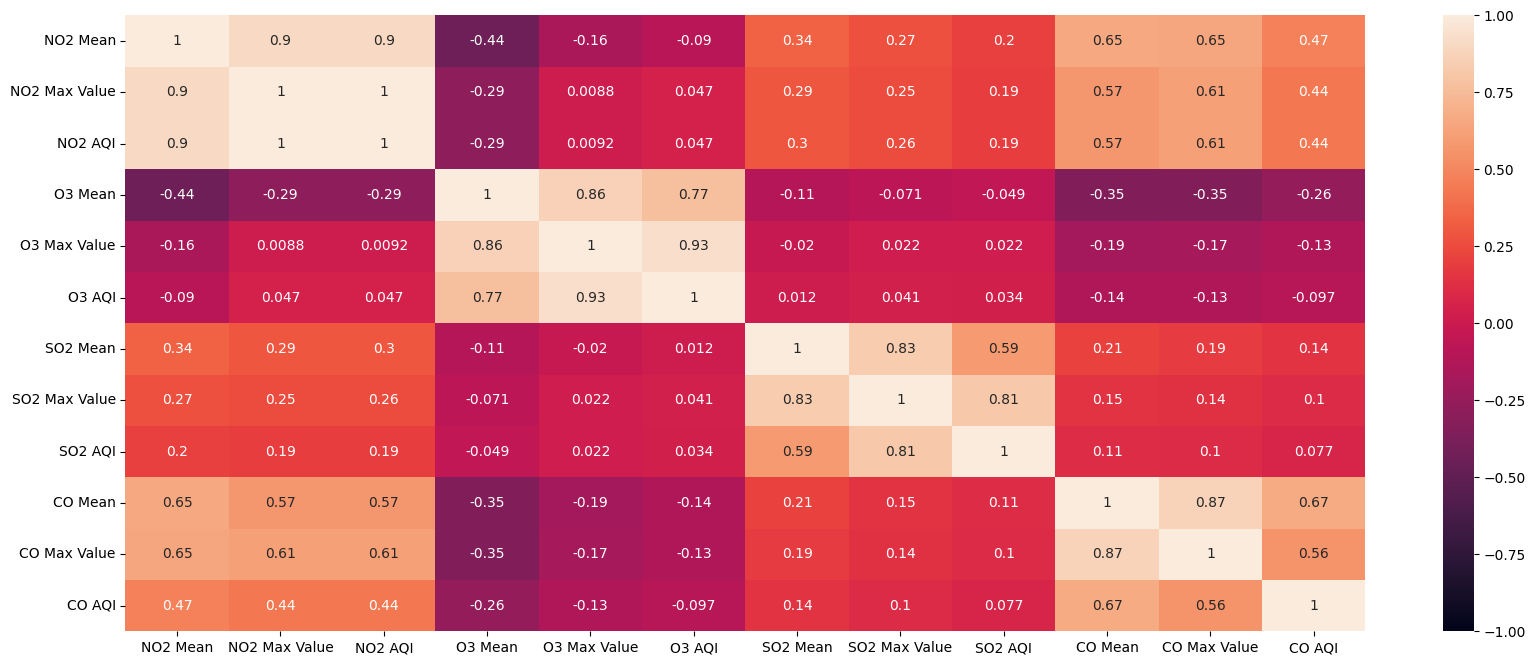

In [21]:
# Source: https://sparkbyexamples.com/pyspark/convert-pyspark-dataframe-topandas/
pandasDF = df.toPandas()
finalDF = pandasDF[['NO2 Mean', 'NO2 Max Value', 'NO2 AQI', 'O3 Mean', 'O3 Max Value', 'O3 AQI', 'SO2 Mean', 'SO2 Max Value',
'SO2 AQI', 'CO Mean', 'CO Max Value', 'CO AQI']]
# Remove Index, State Code, County code, sitenum, max hour cols
# Source: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlationheatmap-in-python-834c0686b88e
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(finalDF.corr(), vmin=-1, vmax=1, annot=True)

# Scatterplot Matrix

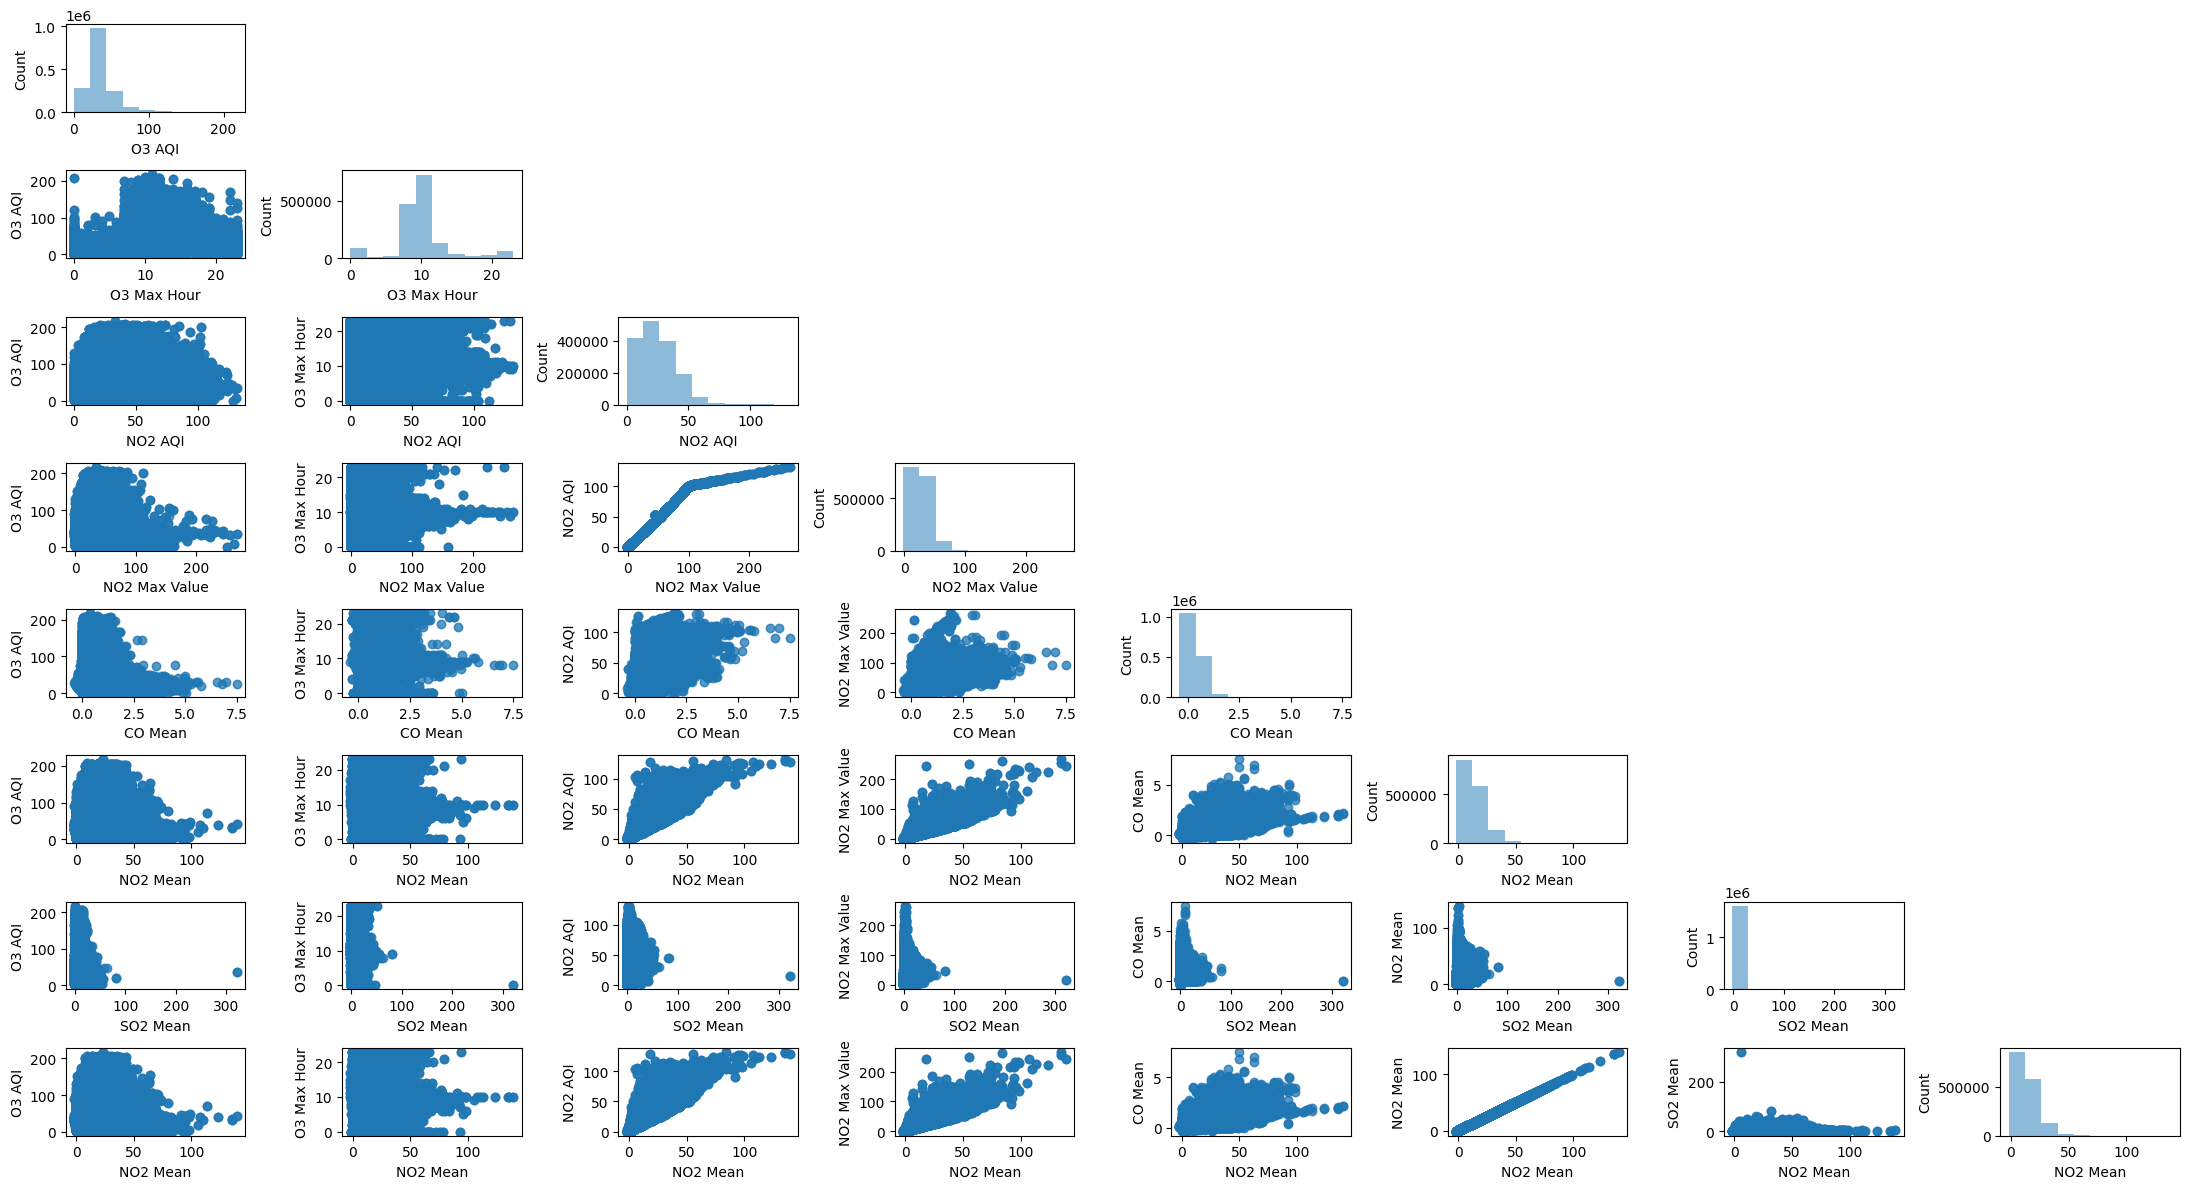

In [22]:
# Scatterplot matrix showing relationships between data features
cols = ['O3 AQI', 'O3 Max Hour', 'NO2 AQI', 'NO2 Max Value', 'CO Mean', 'NO2 Mean', 'SO2 Mean', 'NO2 Mean']
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(pandasDF[cols].values, figsize= (22,12), names=cols,
alpha=0.5)
plt.tight_layout()
plt.show()

# Geospacial and Temporal Analysis

In [23]:
!pip install -q ipython-sql



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.6 MB/s eta 0:00:00


In [24]:
!apt-get install -y sqlite3
%reload_ext sql

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  sqlite3-doc
The following NEW packages will be installed:
  sqlite3
0 upgraded, 1 newly installed, 0 to remove and 33 not upgraded.
Need to get 768 kB of archives.
After this operation, 1,873 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 sqlite3 amd64 3.37.2-2ubuntu0.3 [768 kB]
Fetched 768 kB in 0s (4,332 kB/s)
Selecting previously unselected package sqlite3.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../sqlite3_3.37.2-2ubuntu0.3_amd64.deb ...
Unpacking sqlite3 (3.37.2-2ubuntu0.3) ...
Setting up sqlite3 (3.37.2-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


In [25]:
%sql sqlite://


# Distribution of Daily Max O3 Concentration (ppm)

In [26]:
from pyspark.sql.functions import *
# Register the DataFrame as table 'static_counts'
df.createOrReplaceTempView("pollution")

In [27]:
# Assume 'df' is your DataFrame
df.createOrReplaceTempView("pollution")

# Now you can run SQL queries against the "pollution" view
spark.sql("SELECT * FROM pollution WHERE State = 'California'").show()



+-----+----------+-----------+-------+--------------------+----------+------------+-------+----------+-----------------+---------+-------------+------------+-------+-----------------+--------+------------+-----------+------+-----------------+--------+-------------+------------+---------+-----------------+--------+------------+-----------+--------+
|Index|State Code|County Code|SiteNum|             Address|     State|      County|   City|      Date|        NO2 Units| NO2 Mean|NO2 Max Value|NO2 Max Hour|NO2 AQI|         O3 Units| O3 Mean|O3 Max Value|O3 Max Hour|O3 AQI|        SO2 Units|SO2 Mean|SO2 Max Value|SO2 Max Hour|  SO2 AQI|         CO Units| CO Mean|CO Max Value|CO Max Hour|  CO AQI|
+-----+----------+-----------+-------+--------------------+----------+------------+-------+----------+-----------------+---------+-------------+------------+-------+-----------------+--------+------------+-----------+------+-----------------+--------+-------------+------------+---------+------------

**Distribution of Daily Max O3 Concentration (ppm)**

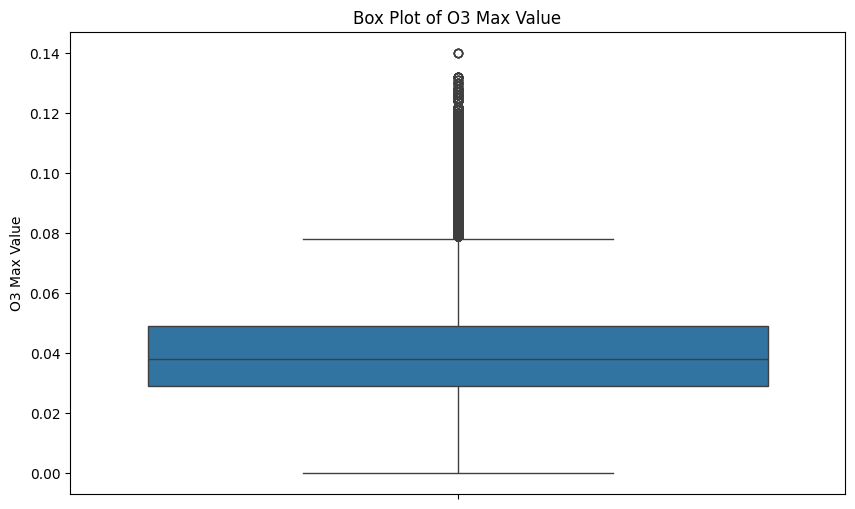

In [28]:

# Run the SQL query and collect the result into a Pandas DataFrame
result_df = spark.sql("SELECT `O3 Max Value` FROM pollution").toPandas()

plt.figure(figsize=(10, 6))
sns.boxplot(y=result_df["O3 Max Value"])
plt.title("Box Plot of O3 Max Value")
plt.ylabel("O3 Max Value")
plt.show()


# Geospacial Analysis of Maximum Daily 8-hour CO Concentration Grouped by US Region and City

**Southeast Cities with Highest CO 1st Max Value**

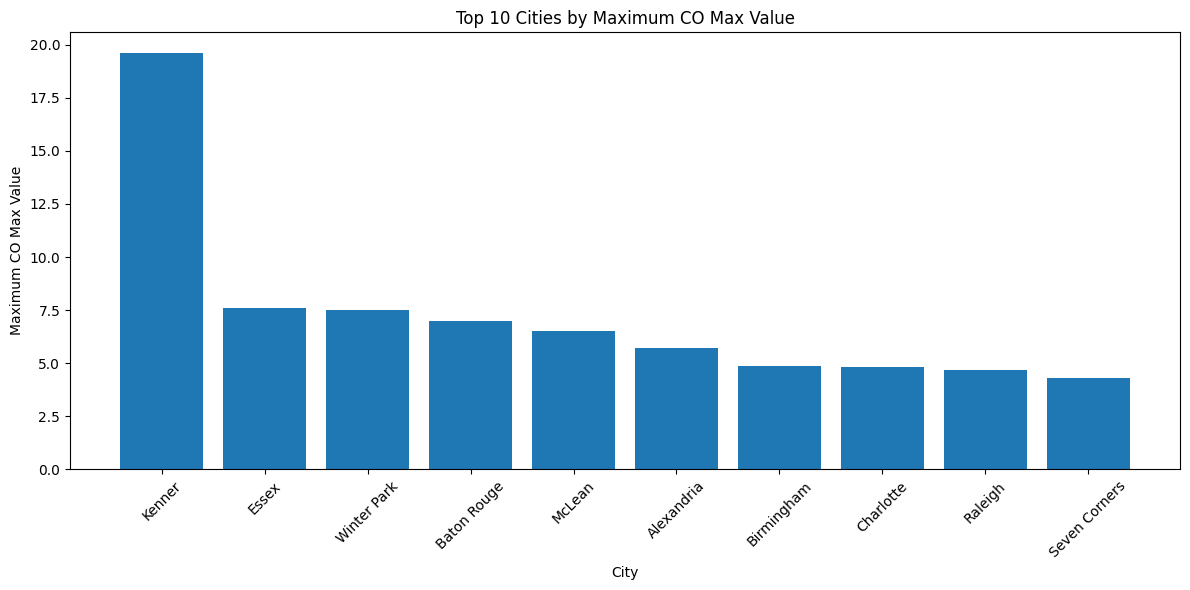

In [29]:
# Run the SQL query and collect the result into a Pandas DataFrame
result_df = spark.sql("""
    SELECT City, MAX(`CO Max Value`) AS COMax
    FROM pollution
    WHERE State IN ('Maryland', 'Virginia', 'North Carolina', 'South Carolina', 'Georgia',
                    'Alabama', 'Mississippi', 'Louisiana', 'Florida', 'Tennessee', 'Kentucky',
                    'West Virginia', 'Delaware')
    GROUP BY City
    ORDER BY COMax DESC
    LIMIT 10
""").toPandas()

# Plot the bar chart using Matplotlib


plt.figure(figsize=(12, 6))
plt.bar(result_df["City"], result_df["COMax"])
plt.xlabel("City")
plt.ylabel("Maximum CO Max Value")
plt.title("Top 10 Cities by Maximum CO Max Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Northeast Cities with Highest CO 1st Max Valu


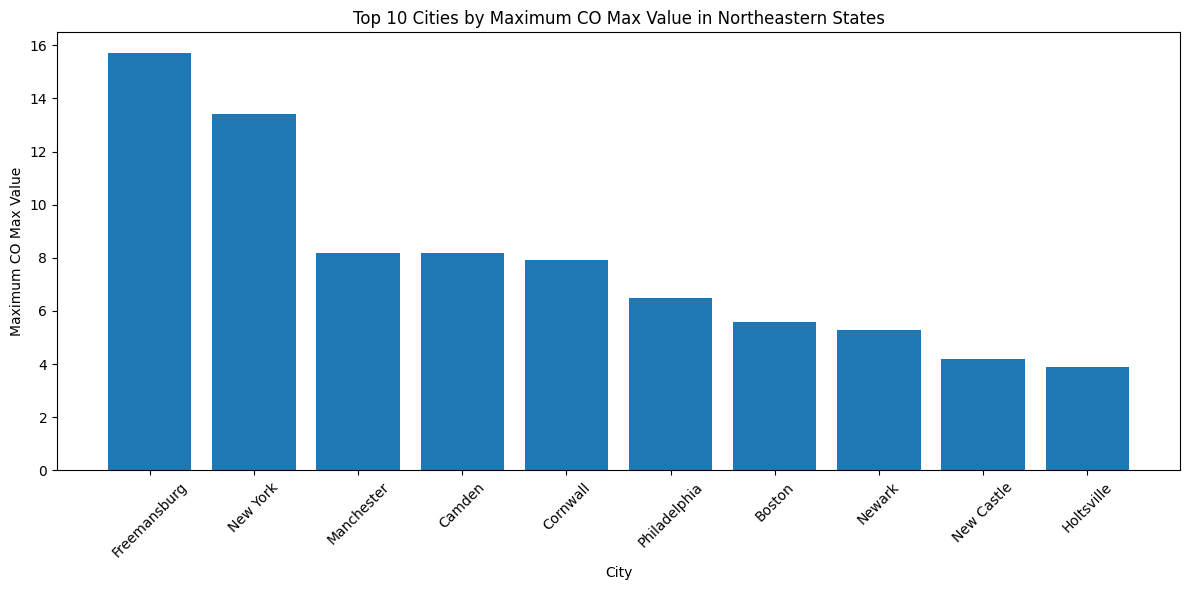

In [30]:
# Run the SQL query
result = spark.sql("""
    SELECT City, MAX(`CO Max Value`) AS COMax
    FROM pollution
    WHERE State IN ('New York', 'Pennsylvania', 'Connecticut', 'Rhode Island', 'Maine', 'New Hampshire', 'Massachusetts', 'New Jersey', 'Vermont')
    GROUP BY City
    ORDER BY COMax DESC
    LIMIT 10
""")

# Convert the result to a Pandas DataFrame for plotting
result_df = result.toPandas()

# Plot the bar chart using Matplotlib


plt.figure(figsize=(12, 6))
plt.bar(result_df["City"], result_df["COMax"])
plt.xlabel("City")
plt.ylabel("Maximum CO Max Value")
plt.title("Top 10 Cities by Maximum CO Max Value in Northeastern States")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Midwest Cities with Highest CO 1st Max Value


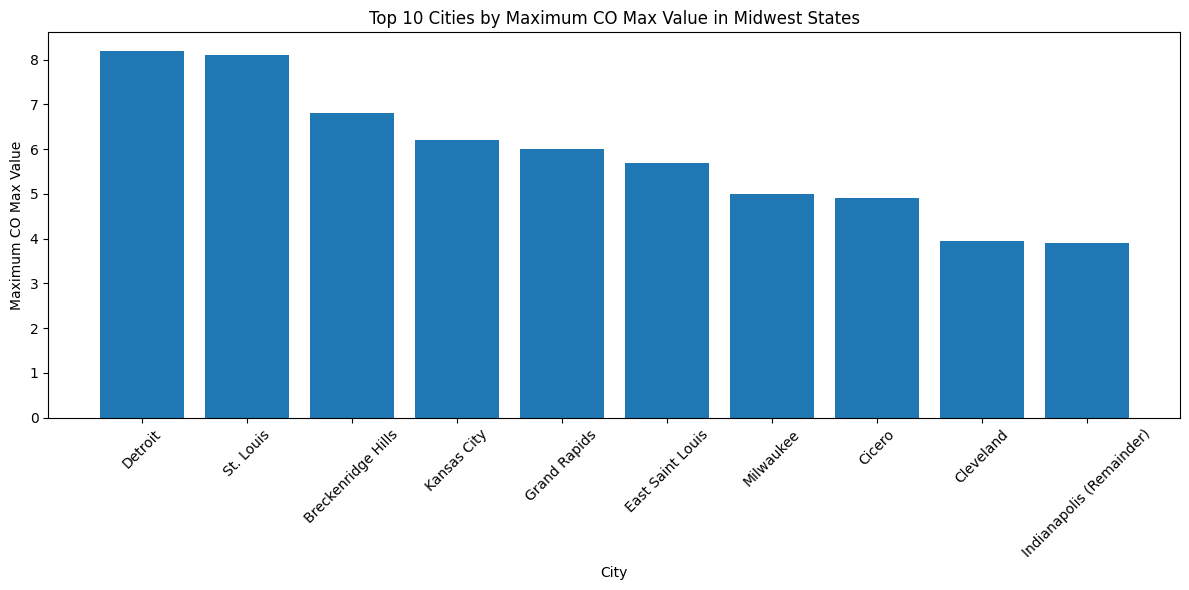

In [31]:
# Run the SQL query
result = spark.sql("""
    SELECT City, MAX(`CO Max Value`) AS COMax
    FROM pollution
    WHERE State IN ('Minnesota', 'North Dakota', 'South Dakota', 'Ohio', 'Nebraska', 'Kansas', 'Iowa', 'Missouri', 'Illinois', 'Indiana', 'Michigan', 'Wisconsin')
    GROUP BY City
    ORDER BY COMax DESC
    LIMIT 10
""")

# Convert the result to a Pandas DataFrame for plotting
result_df = result.toPandas()

# Plot the bar chart using Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(result_df["City"], result_df["COMax"])
plt.xlabel("City")
plt.ylabel("Maximum CO Max Value")
plt.title("Top 10 Cities by Maximum CO Max Value in Midwest States")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# West Cities with Highest CO 1st Max Value (ppm)

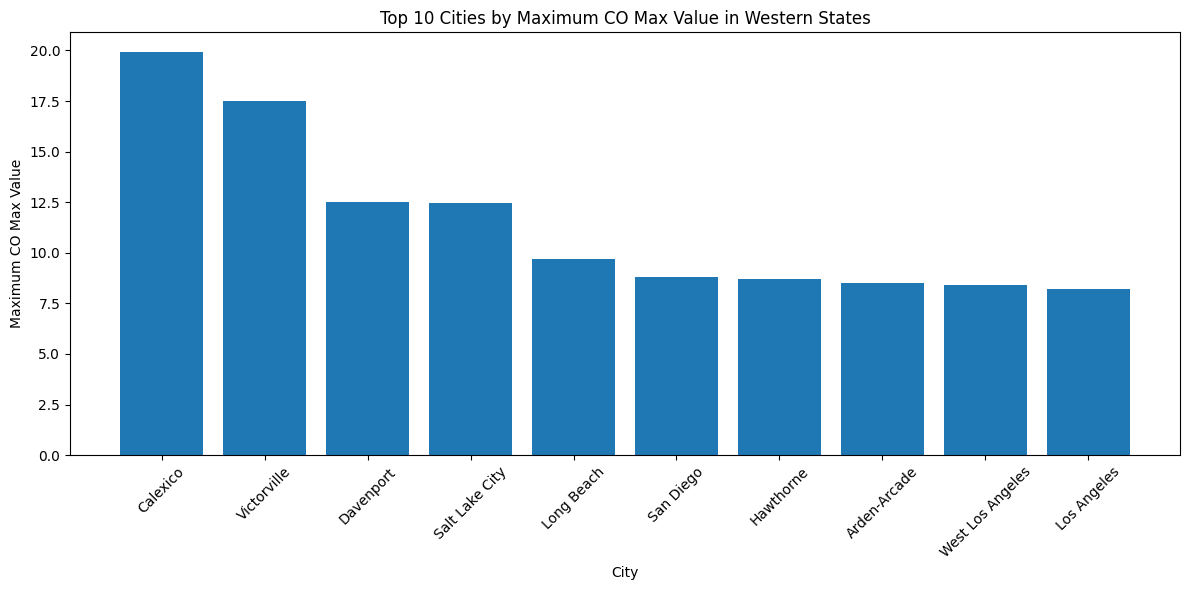

In [32]:
# Run the SQL query
result = spark.sql("""
    SELECT City, MAX(`CO Max Value`) AS COMax
    FROM pollution
    WHERE State IN ('California', 'Oregon', 'Washington', 'Wyoming', 'Idaho', 'Colorado', 'Utah', 'Nevada', 'Montana', 'Alaska', 'Hawaii')
    GROUP BY City
    ORDER BY COMax DESC
    LIMIT 10
""")

# Convert the result to a Pandas DataFrame for plotting
result_df = result.toPandas()

# Plot the bar chart using Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(result_df["City"], result_df["COMax"])
plt.xlabel("City")
plt.ylabel("Maximum CO Max Value")
plt.title("Top 10 Cities by Maximum CO Max Value in Western States")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Southwest Cities with Highest CO 1st Max Valu

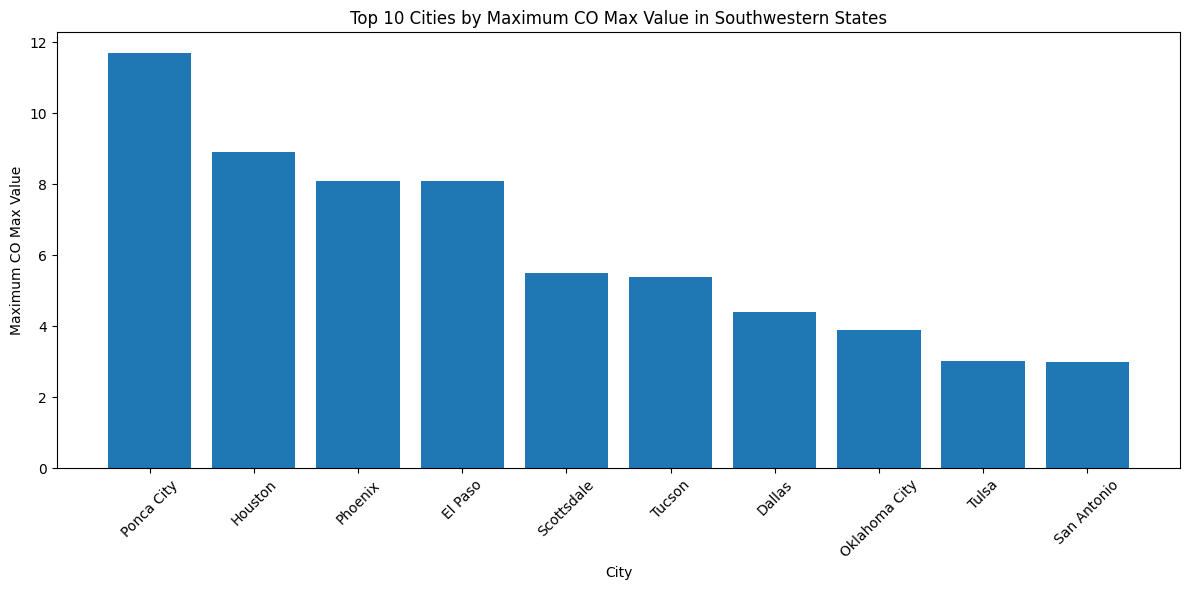

In [33]:
# Run the SQL query
result = spark.sql("""
    SELECT City, MAX(`CO Max Value`) AS COMax
    FROM pollution
    WHERE State IN ('Arizona', 'New Mexico', 'Texas', 'Oklahoma')
    GROUP BY City
    ORDER BY COMax DESC
    LIMIT 10
""")

# Convert the result to a Pandas DataFrame for plotting
result_df = result.toPandas()

# Plot the bar chart using Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(result_df["City"], result_df["COMax"])
plt.xlabel("City")
plt.ylabel("Maximum CO Max Value")
plt.title("Top 10 Cities by Maximum CO Max Value in Southwestern States")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# NO2 AQI Yearly Trends - Southeast Region

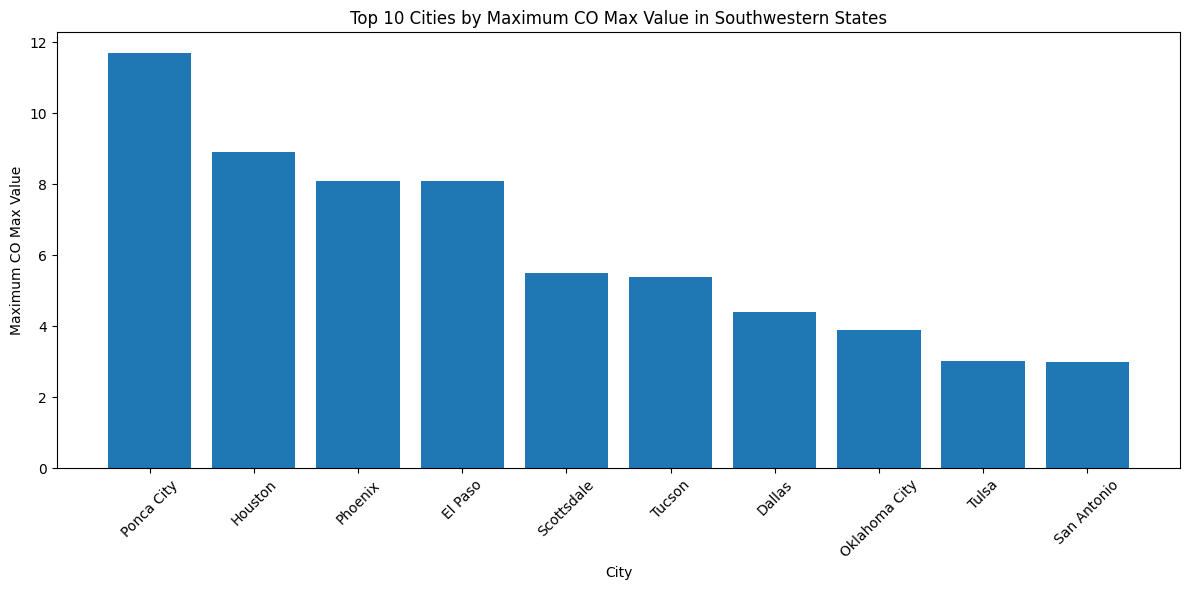

In [34]:
# Run the SQL query
result = spark.sql("""
    SELECT City, MAX(`CO Max Value`) AS COMax
    FROM pollution
    WHERE State IN ('Arizona', 'New Mexico', 'Texas', 'Oklahoma')
    GROUP BY City
    ORDER BY COMax DESC
    LIMIT 10
""")

# Convert the result to a Pandas DataFrame for plotting
result_df = result.toPandas()

# Plot the bar chart using Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(result_df["City"], result_df["COMax"])
plt.xlabel("City")
plt.ylabel("Maximum CO Max Value")
plt.title("Top 10 Cities by Maximum CO Max Value in Southwestern States")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


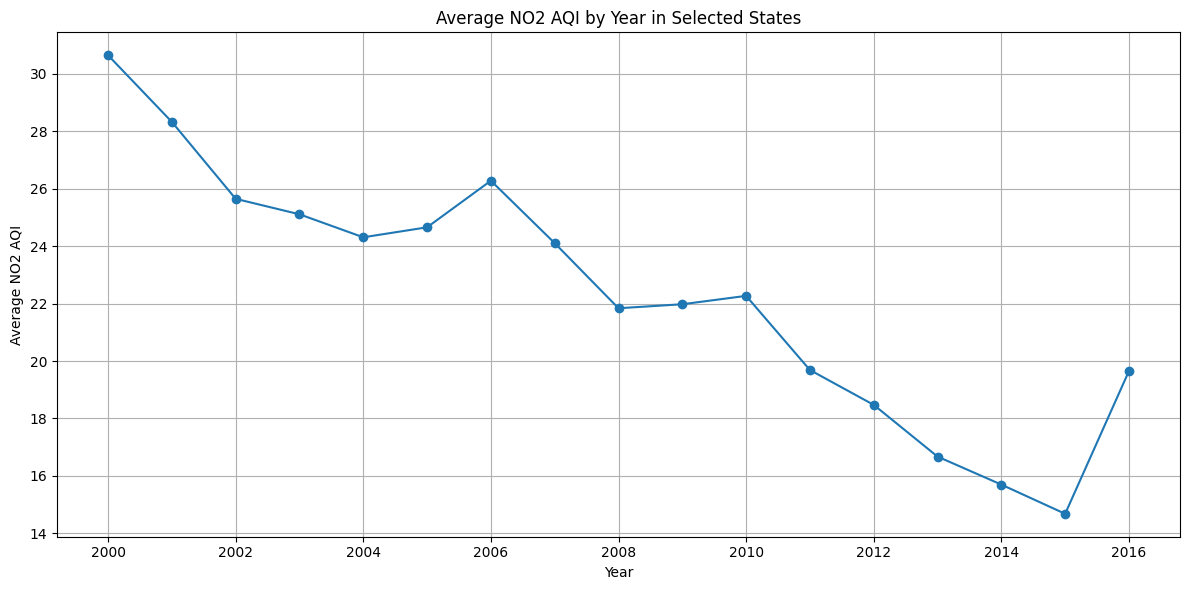

In [36]:
# Run the SQL query
result = spark.sql("""
    SELECT Year(Date) AS Year, AVG(`NO2 AQI`) AS NO2AQI
    FROM pollution
    WHERE State IN ('Maryland', 'Virginia', 'North Carolina', 'South Carolina', 'Georgia',
                    'Alabama', 'Mississippi', 'Louisiana', 'Florida', 'Tennessee', 'Kentucky',
                    'West Virginia', 'Delaware')
    GROUP BY Year
    ORDER BY Year ASC
""")

# Convert the result to a Pandas DataFrame for plotting
result_df = result.toPandas()

# Plot the line chart using Matplotlib


plt.figure(figsize=(12, 6))
plt.plot(result_df["Year"], result_df["NO2AQI"], marker='o')
plt.xlabel("Year")
plt.ylabel("Average NO2 AQI")
plt.title("Average NO2 AQI by Year in Selected States")
plt.grid(True)
plt.tight_layout()
plt.show()


# NO2 AQI Yearly Trends - Northeast Region

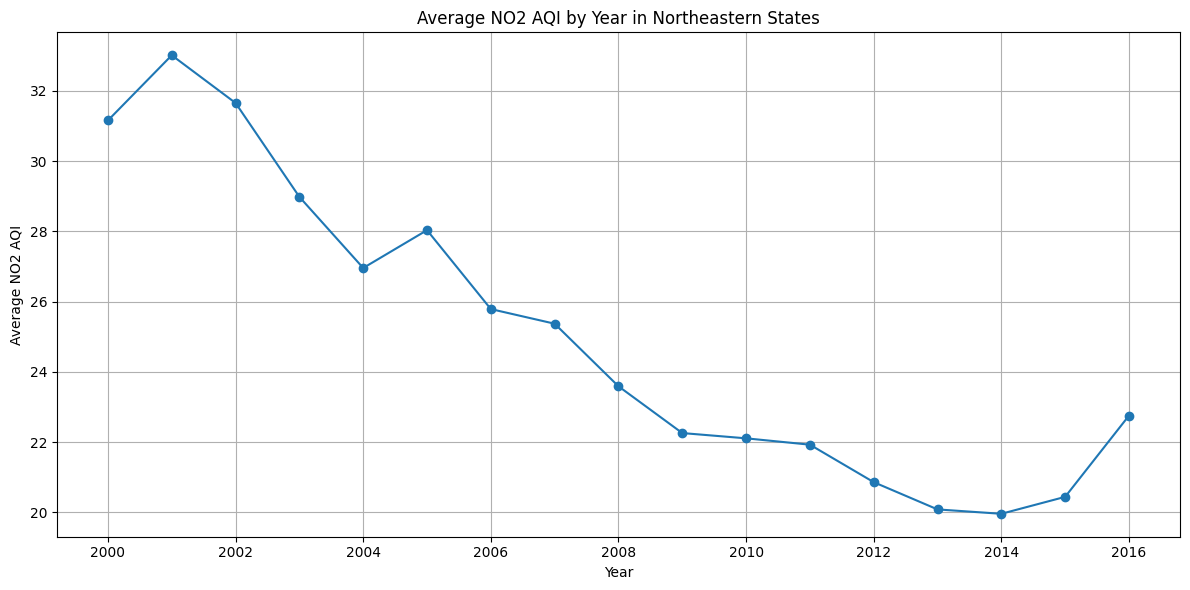

In [37]:
# Run the SQL query
result = spark.sql("""
    SELECT Year(Date) AS Year, AVG(`NO2 AQI`) AS NO2AQI
    FROM pollution
    WHERE State IN ('New York', 'Pennsylvania', 'Connecticut', 'Rhode Island', 'Maine', 'New Hampshire', 'Massachusetts', 'New Jersey', 'Vermont')
    GROUP BY Year
    ORDER BY Year ASC
""")

# Convert the result to a Pandas DataFrame for plotting
result_df = result.toPandas()

# Plot the line chart using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(result_df["Year"], result_df["NO2AQI"], marker='o')
plt.xlabel("Year")
plt.ylabel("Average NO2 AQI")
plt.title("Average NO2 AQI by Year in Northeastern States")
plt.grid(True)
plt.tight_layout()
plt.show()


# NO2 AQI Yearly Trends - Midwest Region

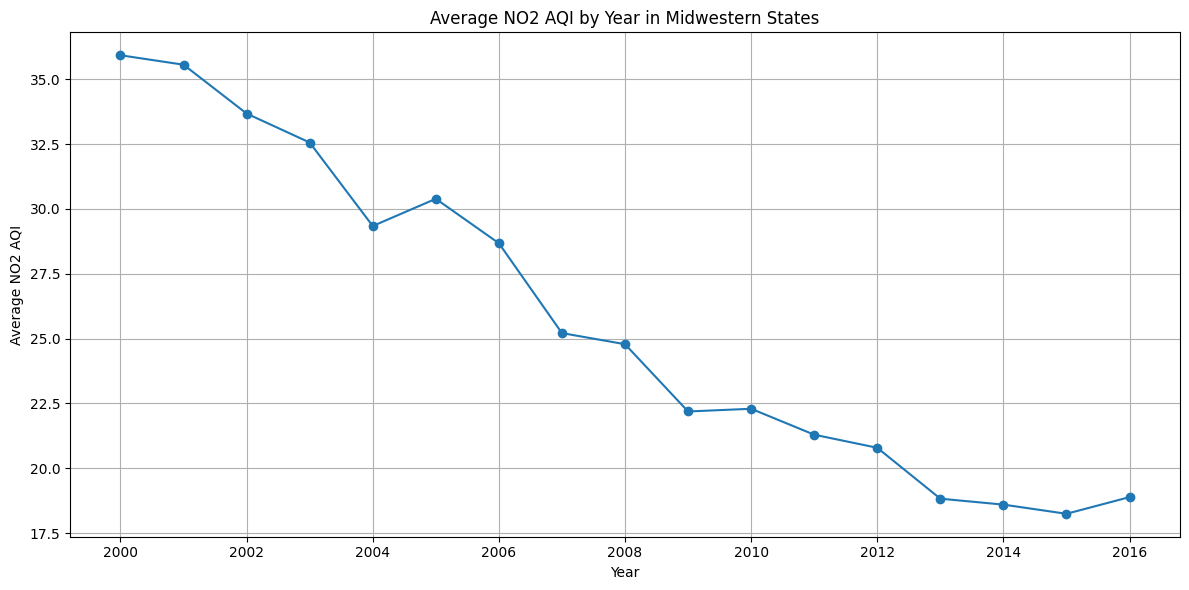

In [40]:
# Run the SQL query
result = spark.sql("""
    SELECT Year(Date) AS Year, AVG(`NO2 AQI`) AS NO2AQI
    FROM pollution
    WHERE State IN ('Minnesota', 'North Dakota', 'South Dakota', 'Ohio', 'Nebraska', 'Kansas', 'Iowa', 'Missouri', 'Illinois', 'Indiana', 'Michigan', 'Wisconsin')
    GROUP BY Year
    ORDER BY Year ASC
""")

# Convert the result to a Pandas DataFrame for plotting
result_df = result.toPandas()

# Plot the line chart using Matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(result_df["Year"], result_df["NO2AQI"], marker='o')
plt.xlabel("Year")
plt.ylabel("Average NO2 AQI")
plt.title("Average NO2 AQI by Year in Midwestern States")
plt.grid(True)
plt.tight_layout()
plt.show()



# NO2 AQI Yearly Trends - West Region

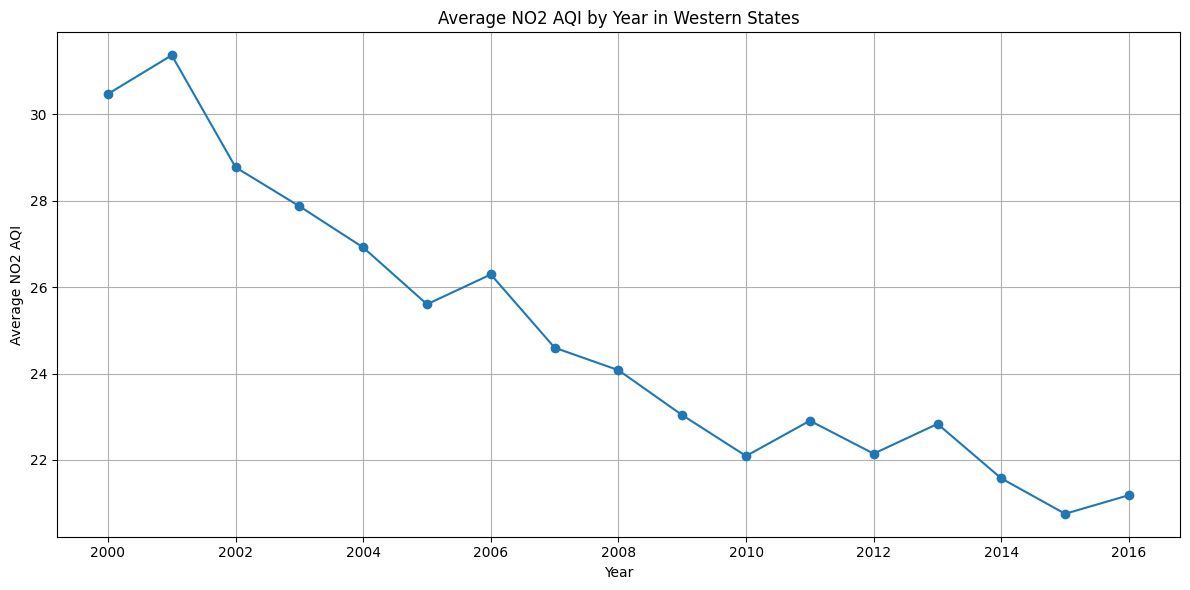

In [41]:
# Run the SQL query
result = spark.sql("""
    SELECT Year(Date) AS Year, AVG(`NO2 AQI`) AS NO2AQI
    FROM pollution
    WHERE State IN ('California', 'Oregon', 'Washington', 'Wyoming', 'Idaho', 'Colorado', 'Utah', 'Nevada', 'Montana', 'Alaska', 'Hawaii')
    GROUP BY Year
    ORDER BY Year ASC
""")

# Convert the result to a Pandas DataFrame for plotting
result_df = result.toPandas()

# Plot the line chart using Matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(result_df["Year"], result_df["NO2AQI"], marker='o')
plt.xlabel("Year")
plt.ylabel("Average NO2 AQI")
plt.title("Average NO2 AQI by Year in Western States")
plt.grid(True)
plt.tight_layout()
plt.show()


#NO2 AQI Yearly Trends - Southwest Region

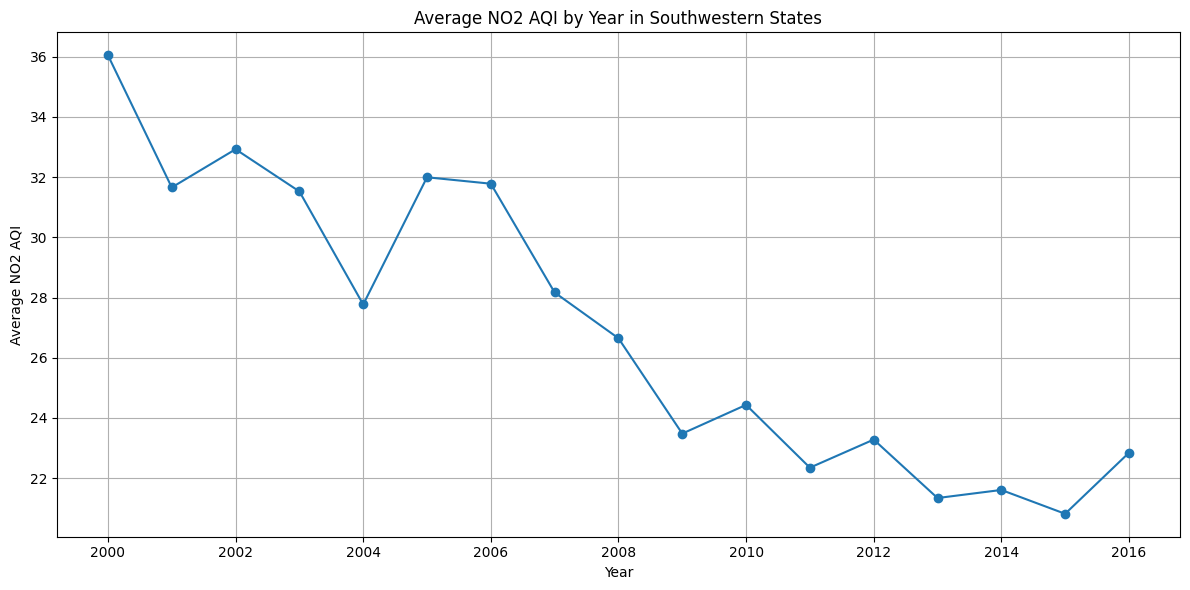

In [42]:
# Run the SQL query
result = spark.sql("""
    SELECT Year(Date) AS Year, AVG(`NO2 AQI`) AS NO2AQI
    FROM pollution
    WHERE State IN ('Arizona', 'New Mexico', 'Texas', 'Oklahoma')
    GROUP BY Year
    ORDER BY Year ASC
""")

# Convert the result to a Pandas DataFrame for plotting
result_df = result.toPandas()

# Plot the line chart using Matplotlib


plt.figure(figsize=(12, 6))
plt.plot(result_df["Year"], result_df["NO2AQI"], marker='o')
plt.xlabel("Year")
plt.ylabel("Average NO2 AQI")
plt.title("Average NO2 AQI by Year in Southwestern States")
plt.grid(True)
plt.tight_layout()
plt.show()


# Yearly Average of NO2 for Some Selected Stat

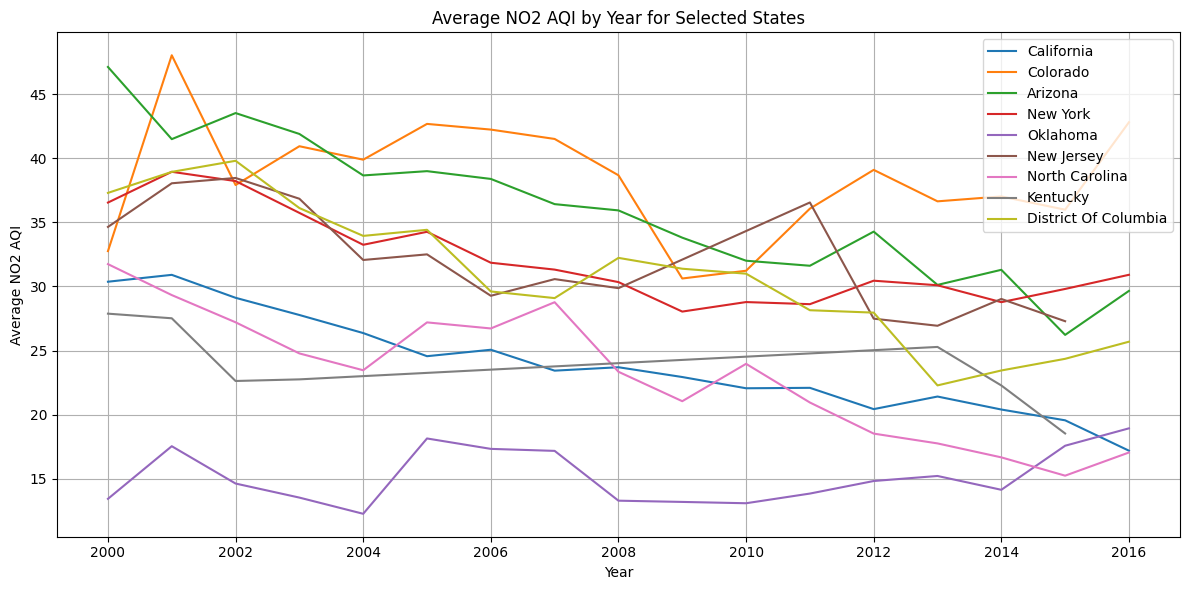

In [45]:
# Convert the PySpark DataFrame to a Pandas DataFrame
result_pd = result_df.toPandas()

# Plot the line chart using Matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Iterate over each state and plot the line for each state
for state in result_pd['State'].unique():
    state_data = result_pd[result_pd['State'] == state]
    plt.plot(state_data['Year'], state_data['Avg NO2 AQI'], label=state)

plt.xlabel("Year")
plt.ylabel("Average NO2 AQI")
plt.title("Average NO2 AQI by Year for Selected States")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



#Yearly Average of NO2 for All States


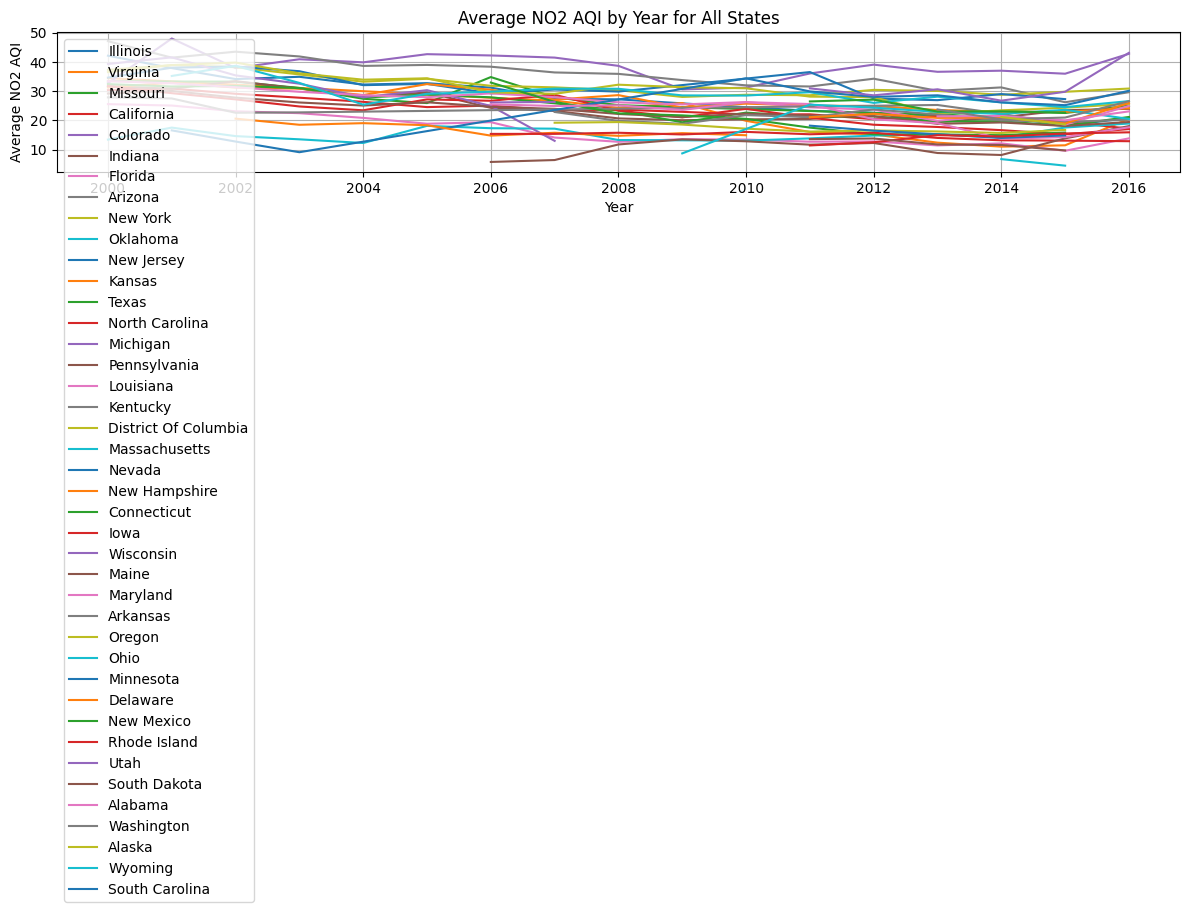

In [47]:
# Convert the PySpark DataFrame to a Pandas DataFrame
result_pd = result_df.toPandas()

# Plot the line chart using Matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Iterate over each state and plot the line for each state
for state in result_pd['State'].unique():
    state_data = result_pd[result_pd['State'] == state]
    plt.plot(state_data['Year'], state_data['Avg NO2 AQI'], label=state)

plt.xlabel("Year")
plt.ylabel("Average NO2 AQI")
plt.title("Average NO2 AQI by Year for All States")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



#Yearly Average of SO2 for All States

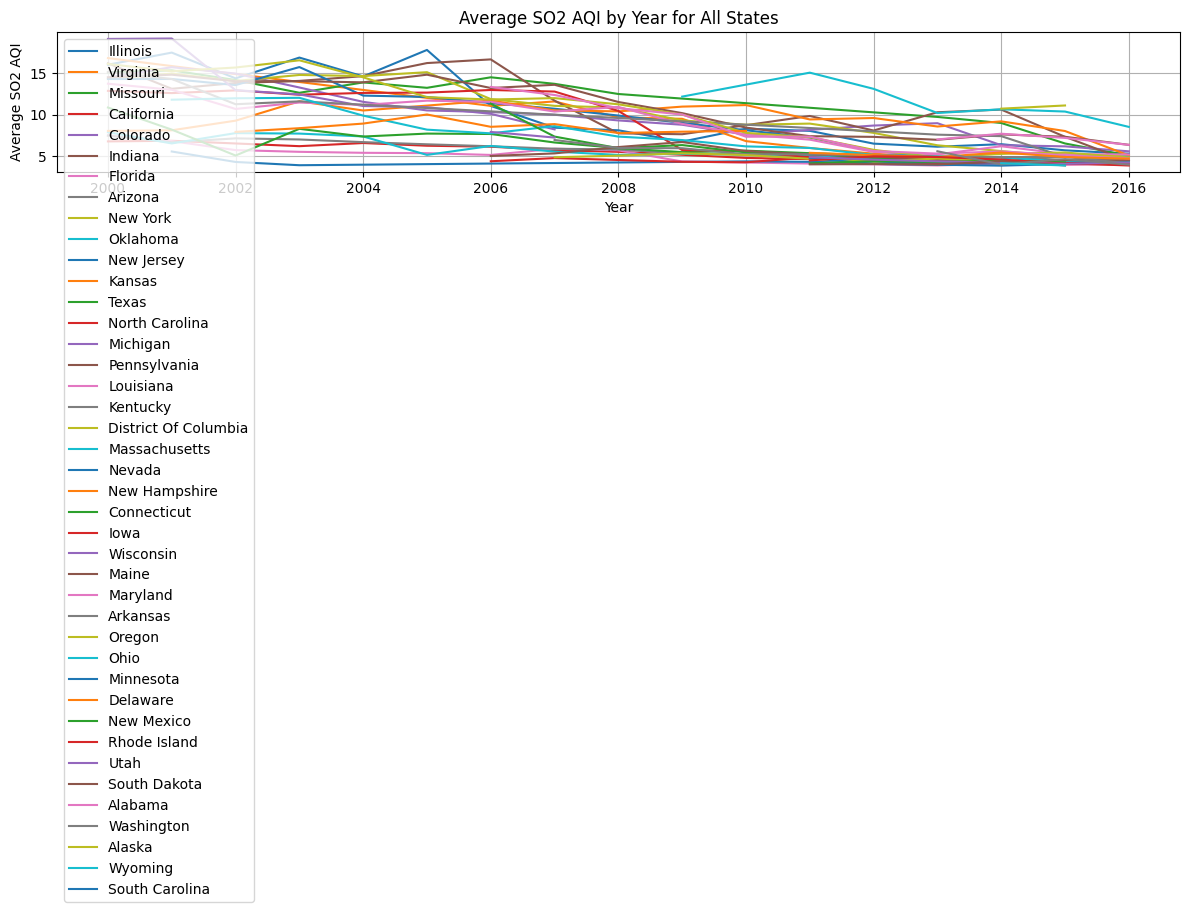

In [66]:
# Convert the PySpark DataFrame to a Pandas DataFrame
result_pd = result_df.toPandas()

# Plot the line chart using Matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Iterate over each state and plot the line for each state
for state in result_pd['State'].unique():
    state_data = result_pd[result_pd['State'] == state]
    plt.plot(state_data['Year'], state_data['Avg SO2 AQI'], label=state)

plt.xlabel("Year")
plt.ylabel("Average SO2 AQI")
plt.title("Average SO2 AQI by Year for All States")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

